In [ ]:
#!pip install strawberryfields

In [ ]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import *

#eng, q = sf.Engine(2)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [36]:
# Cutoff dimension
cutoff = 10

# Number of layers
depth = 25

# Number of steps in optimization routine performing gradient descent
reps = 1000

# Penalty coefficient to ensure the state is normalized
penalty_strength = 100

# Standard deviation of initial parameters
passive_sd = 0.1
active_sd = 0.001

In [37]:
# squeeze gate
sq_r = tf.Variable(tf.random_normal(shape=[depth], stddev=active_sd))
sq_phi = tf.Variable(tf.random_normal(shape=[depth], stddev=passive_sd))

# displacement gate
d_r = tf.Variable(tf.random_normal(shape=[depth], stddev=active_sd))
d_phi = tf.Variable(tf.random_normal(shape=[depth], stddev=passive_sd))

# Beam
b_r = tf.Variable(tf.random_normal(shape=[depth], stddev=active_sd))
b_phi = tf.Variable(tf.random_normal(shape=[depth], stddev=passive_sd))

# rotation gates
r1 = tf.Variable(tf.random_normal(shape=[depth], stddev=passive_sd))
r2 = tf.Variable(tf.random_normal(shape=[depth], stddev=passive_sd))

# kerr gate
kappa = tf.Variable(tf.random_normal(shape=[depth], stddev=active_sd))

In [ ]:
params = [r1, sq_r, sq_phi, r2,d_r, d_phi, kappa]

In [ ]:
# layer architecture
def layer(i, q):
    Rgate(r1[i]) | q
    Sgate(sq_r[i], sq_phi[i]) | q
    Rgate(r2[i]) | q
    Dgate(d_r[i], d_phi[i]) | q
    Kgate(kappa[i]) | q

In [ ]:
def U(i):
    reg = [0, 1]

    Rgate(r1[i]),  (reg[0])
    Rgate(r1[i]),  (reg[1])
    BSgate(b_r[i], b_phi[i]),  (reg[0], reg[1])
    Rgate(r2[i]),  (reg[0])
    Rgate(r2[i]),  (reg[1])
    
    Sgate(sq_r[i], sq_phi[i]), (reg[0])
    Sgate(sq_r[i], sq_phi[i]), (reg[1])
    
    Rgate(r1[i]),  (reg[0])
    Rgate(r1[i]),  (reg[1])
    BSgate(b_r[i], b_phi[i]),  (reg[0], reg[1])
    Rgate(r2[i]),  (reg[0])
    Rgate(r2[i]),  (reg[1])
    
    Dgate(d_r[i], d_phi[i]) | reg[0]
    Kgate(kappa[i]) | reg[0]
    
    Dgate(d_r[i], d_phi[i]) | reg[1]
    Kgate(kappa[i]) | reg[1]

In [ ]:
#x = [0,1,2]
inp = tf.Variable(x)
inp
batch_size = len(x)

In [10]:
Tetris = [[1,1,1],[0,1,0],
         [0,0,0]]

In [19]:
Out_Mat = np.abs(probs[:3, :3])
Out_Mat

array([[0.08214343, 0.10265005, 0.06413805],
       [0.10265006, 0.12827604, 0.08014974],
       [0.06413804, 0.08014974, 0.05007935]], dtype=float32)

In [20]:
np.sum(Out_Mat - Tetris)


-3.2456254959106445

In [ ]:
loss = tf.reduce_sum(Out_Mat - Tetris)
loss

In [ ]:
print(abs(probs[0][1,1]) )

In [ ]:
d = sess.run(prob)

In [ ]:
probs[1,1]

In [40]:
#actual


engine, q = sf.Engine(2)
with engine:
    Coherent(1+0.5j) | q[0] 
    Coherent(1+0.5j) | q[1] 
    Dgate(0) | q[0]
    Dgate(0) | q[1]
    for k in range(25):

        U(k)

# Run engine


state = engine.run('tf', cutoff_dim=cutoff, eval=False)
#ket = state.ket()

#prob = state.fock_prob([1])
probs = state.all_fock_probs()

Out_Mat = np.abs(probs[:3, :3])

loss = tf.reduce_sum(np.abs((Out_Mat - Tetris) ) )
#loss = tf.reduce_sum(np.abs((np.trace(Out_Mat) - np.trace(Tetris) ) ))


sess = tf.Session()
sess.run(tf.global_variables_initializer())    
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
minimize_op = optimizer.minimize(loss)


# Run optimization
reps = 5

for i in range(reps):

    # one repitition of the optimization
    _, loss_val, Out_Mat_val = sess.run([minimize_op, loss,  Out_Mat])

    # Stores fidelity at each step


In [42]:
Out_Mat_val

array([[0.44650584, 0.08124311, 0.05139321],
       [0.08124308, 0.01478242, 0.00935114],
       [0.05139324, 0.00935114, 0.00591539]], dtype=float32)

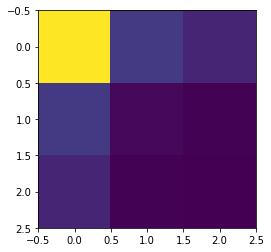

In [45]:
import matplotlib.pyplot as plt
plt.imshow(Out_Mat_val)
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(cum_Err_dict['depth'], cum_Err_dict['Err'] ,'.' , c= 'red' )

ax1.set_xlabel('Depth', fontsize=12)
ax1.set_ylabel('Err', fontsize=12)
#ax.set_title('500 Repetation')
ax1.set_xlim(0, 12)
ax1.set_ylim(0, 100)

ax1.axis('tight')
plt.savefig('8_Out_of_Range_Predicted.jpg')
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, (y)  ,'.' , c= 'red', label='Actual Data' )
ax.plot(x, y_actual  ,'-' , c= 'green', label='Actual Function' )
ax.plot(x_test, y_All[8]['y_test_predicted_2']  ,'*', label='Aproximated Function'  )
ax.set_xlabel('Train Data', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_title('500 Repetation')
legend = ax.legend(loc=[0.5,0.1], shadow=True, fontsize=10)
ax.axis('tight')
plt.savefig('8_Out_of_Range_Predicted.jpg')
plt.show()

In [ ]:
params[0].shape

In [ ]:
expectation_val
